In [20]:
import re

import pandas as pd

df = pd.read_csv('apple_sentiment_output.csv')

def extract_model_output(text):
    match = re.search(r'Model output:\s+(\w+)', text)
    if match:
        return match.group(1)
    return None  # or some default value
df = df.dropna(subset=['Sentiment'])
 

# # Applying the function to create the new column
df['Model Output'] = df['Sentiment'].apply(extract_model_output)
# 
df = df[~(df['Model Output'] == 'none')]
df['True Label'] = df['Model Output']

df 
df.to_csv('apple_sentiment_output_v2.csv', index=False)

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('apple_sentiment_output_v2.csv')

conf_matrix = confusion_matrix(df['True Label'], df['Model Output'])


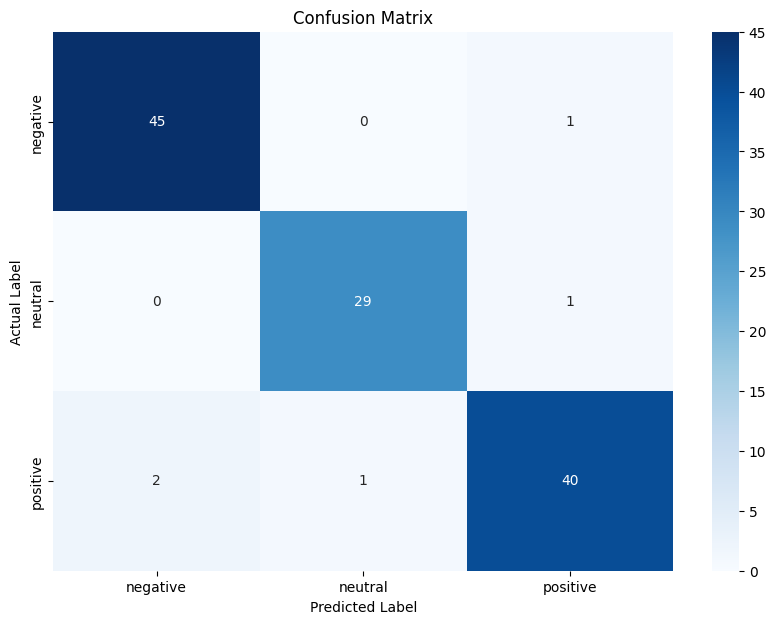

In [22]:
label_names = sorted(df['True Label'].unique())  # ensure labels are sorted consistently
conf_matrix_df = pd.DataFrame(conf_matrix, index=label_names, columns=label_names)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()